# Name: Jainam Khetani

# Oasis Infobyte Internship TASK 2 LEVEL 2
# Idea: Wine Quality Prediction

## Description:
The focus is on predicting the quality of wine based on its chemical characteristics, offering a real-world application of machine learning in the context of viticulture. The dataset encompasses diverse chemical attributes, including density and acidity, which serve as the features for three distinct classifier models.

## Dataset:
The dataset used is the Wine Quality Dataset, which includes features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. The quality column is the target variable, ranging from 3 to 8.

## Key Concepts and Challenges:
1. **Classifier Models:** Utilizing Random Forest, Stochastic Gradient Descent, and Support Vector Classifier (SVC) for wine quality prediction.
2. **Chemical Qualities:** Analyzing features like density and acidity as predictors for wine quality.
3. **Data Analysis Libraries:** Employing Pandas for data manipulation and NumPy for array operations.
4. **Data Visualization:** Using Seaborn and Matplotlib for visualizing patterns and insights in the dataset.


## Step 1: Import Libraries
We import the necessary libraries for data manipulation, visualization, and machine learning. This includes Pandas for data handling, NumPy for numerical operations, Matplotlib and Seaborn for visualization, and Scikit-learn for machine learning models and evaluation metrics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline


## Step 2: Load and Explore the Dataset
We load the dataset using Pandas. Since the dataset path is provided in the original notebook, we assume it's available locally. We then explore the dataset to understand its structure, check for missing values, and get a sense of the data distribution.

#### Download Dataset using opendatasets

In [ ]:
# !pip install opendatasets
import opendatasets as od

In [2]:
df_link= 'https://www.kaggle.com/datasets/yasserh/wine-quality-dataset'
od.download(df_link)

# {"username":"omchoksi04","key":"5bd54ee741a1835da715caead453e032"}

Skipping, found downloaded files in ".\wine-quality-dataset" (use force=True to force download)


In [3]:
# Load the dataset
df = pd.read_csv("D:\\INTERNSHIP\\Oasis Infobyte\\LEVEL 2\\WINE_QUALITY_ANALYSIS\\wine-quality-dataset\\WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
# Check the shape of the dataset
print("\nDataset Shape:", df.shape)


Dataset Shape: (1143, 13)


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [6]:
# Basic statistics of the dataset
print("\nDataset Description:")
print(df.describe())


Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000        

In [43]:
# # Drop the 'Id' column as it's not a feature
# df = df.drop('Id', axis=1)

In [42]:
# Detect and remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verify the new shape after outlier removal
print("Dataset Shape After Outlier Removal:", df.shape)

Dataset Shape After Outlier Removal: (834, 12)


## Step 3: Preprocessing
We split the dataset into training and test sets and scale the features to ensure the models perform optimally, especially for SVC and SGD which are sensitive to feature scales.

In [ ]:
# Split the data
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Drop the 'Id' column as it's not a feature
df = df.drop('Id', axis=1)

## Step 3: Data Visualization
We use Seaborn and Matplotlib to visualize the data. This includes plotting the distribution of the target variable (quality) and exploring relationships between features like density, acidity, and quality.

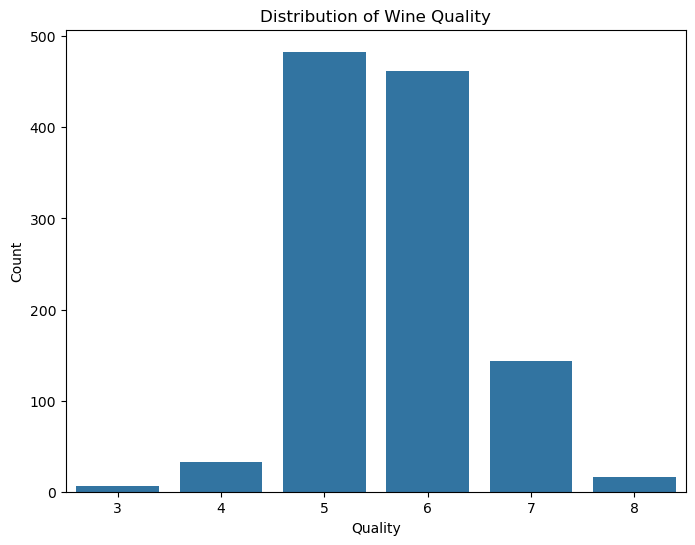

In [8]:
# Distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

This distribution suggests that any machine learning model trained on this data might need special handling for the rare classes (3,4,7,8) to prevent bias toward the majority classes (5,6).

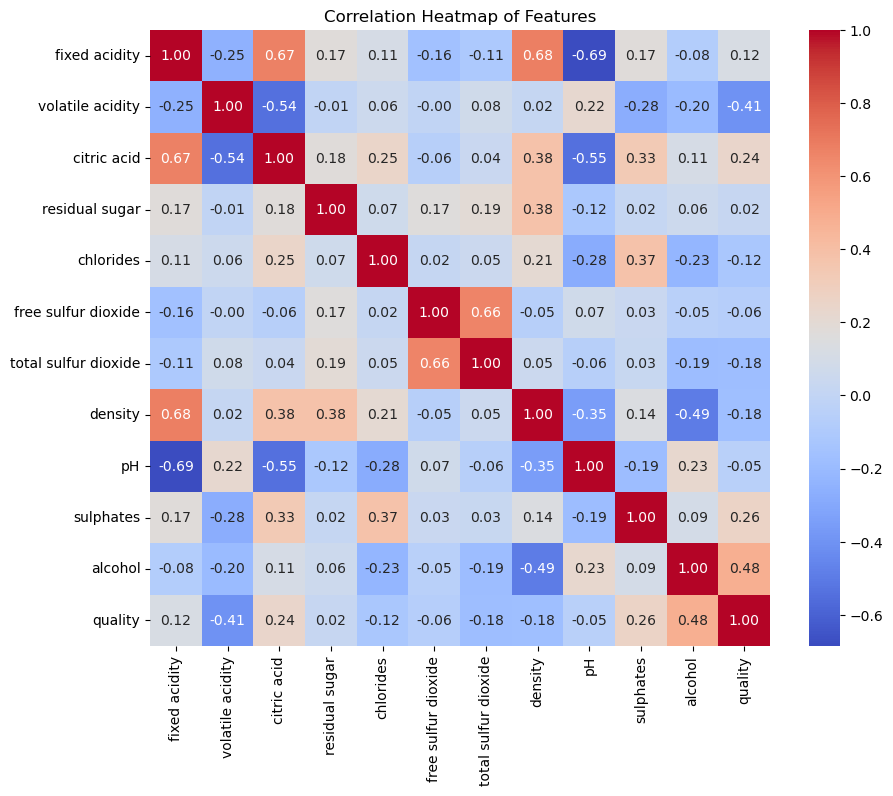

In [20]:
# Correlation heatmap to see relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()



#### Correlation Analysis
The correlation heatmap reveals several important relationships between wine features. The strongest positive correlation with wine quality is shown by alcohol content (0.48), while volatile acidity shows the strongest negative correlation (-0.41). This suggests that higher alcohol content tends to indicate better quality wines, while higher volatile acidity is associated with lower quality. Other notable correlations include the relationship between fixed acidity and pH (-0.69), and the strong connection between free and total sulfur dioxide (0.66), which is expected given their chemical relationship

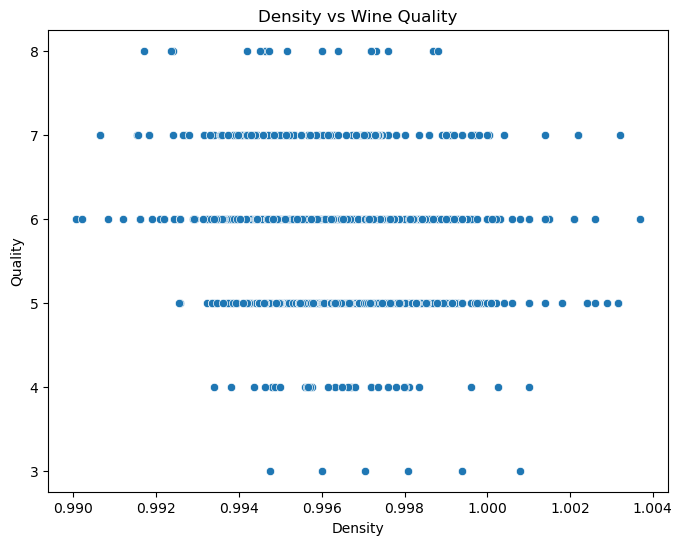

In [9]:
# Scatter plot of density vs quality
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='quality', data=df)
plt.title('Density vs Wine Quality')
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()



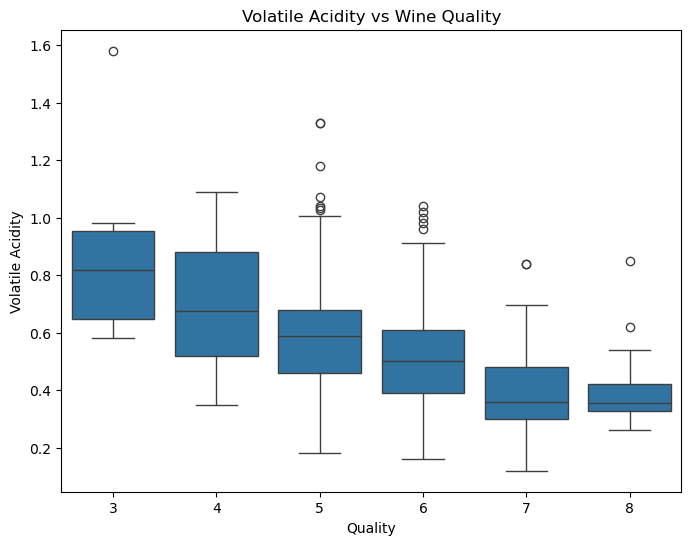

In [22]:
# Box plot of volatile acidity vs quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

#### Volatile Acidity Analysis
The boxplot reveals a strong inverse relationship between volatile acidity and wine quality. Higher quality wines consistently show lower volatile acidity levels, with the best wines (quality 7-8) having volatile acidity below 0.4. This suggests that controlling volatile acidity during wine production is crucial for achieving higher quality ratings. The presence of outliers, particularly in medium-quality wines, indicates that while volatile acidity is important, it's not the only determining factor of wine quality.

## Step 4: Data Preprocessing
We prepare the data for modeling by splitting it into features (X) and target (y), scaling the features using StandardScaler, and splitting the data into training and testing sets.

In [10]:
# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Step 5: Train and Evaluate Models
We train three classifier models: Random Forest, SGD Classifier, and SVC. We then evaluate each model using accuracy and classification report (precision, recall, F1-score).

In [11]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

In [16]:
# Train the models
#Random Forest Classifier
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:
#SGD Classifier
sgd_model.fit(X_train_scaled, y_train)


SGDClassifier(random_state=42)

In [18]:
#Support Vector Classifier
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [19]:

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)
sgd_pred = sgd_model.predict(X_test_scaled)
svc_pred = svc_model.predict(X_test_scaled)


In [21]:

# Evaluate the models
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred, zero_division=0))

print("\nSGD Classifier:")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred, zero_division=0))

print("\nSupport Vector Classifier (SVC):")
print("Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred, zero_division=0))

Random Forest Classifier:
Accuracy: 0.6986899563318777
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229


SGD Classifier:
Accuracy: 0.5021834061135371
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                  

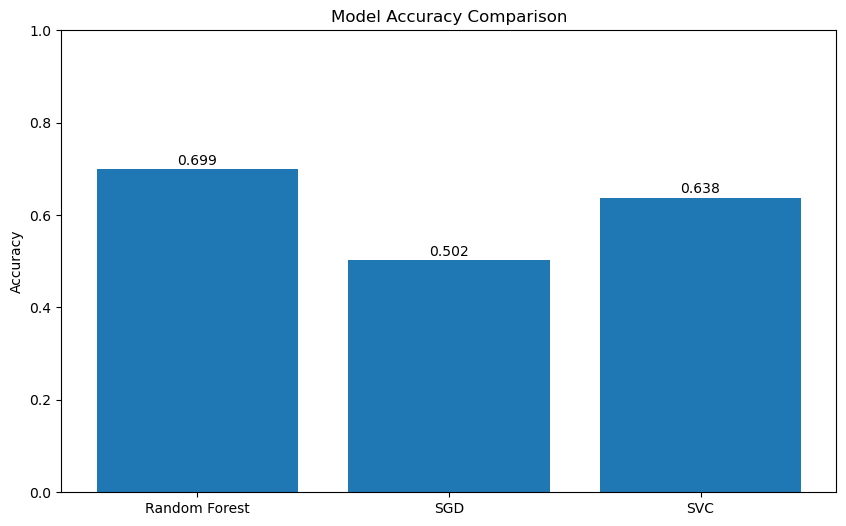


Best model is: Random Forest


In [22]:
# Compare model performance and choose the best one
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, sgd_pred),
    accuracy_score(y_test, svc_pred)
]

# Create bar plot of accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()

print("\nBest model is:", models[np.argmax(accuracies)])

## Step 6: Feature Importance (Random Forest)
Since Random Forest provides feature importance, we visualize the importance of each feature to understand which chemical properties most influence wine quality.

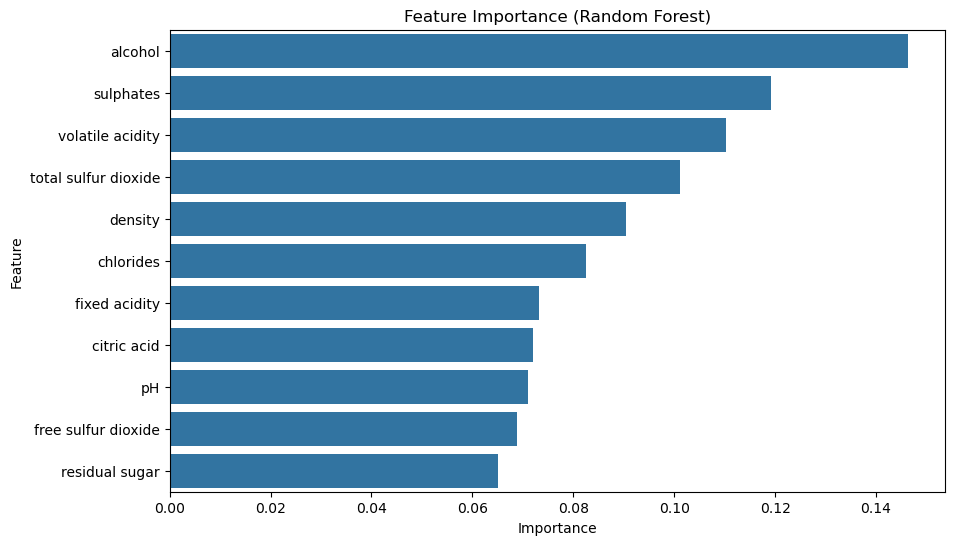

In [18]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Step 7: Actual Model Evaluation RandomForest 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [36]:
# Select top features (e.g., top 5)
top_features = ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'density','chlorides','fixed acidity', 'pH','free sulfur dioxide','residual sugar']
X_top = df[top_features]
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [40]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.46033860941676386
RMSE: 0.5480027252665478


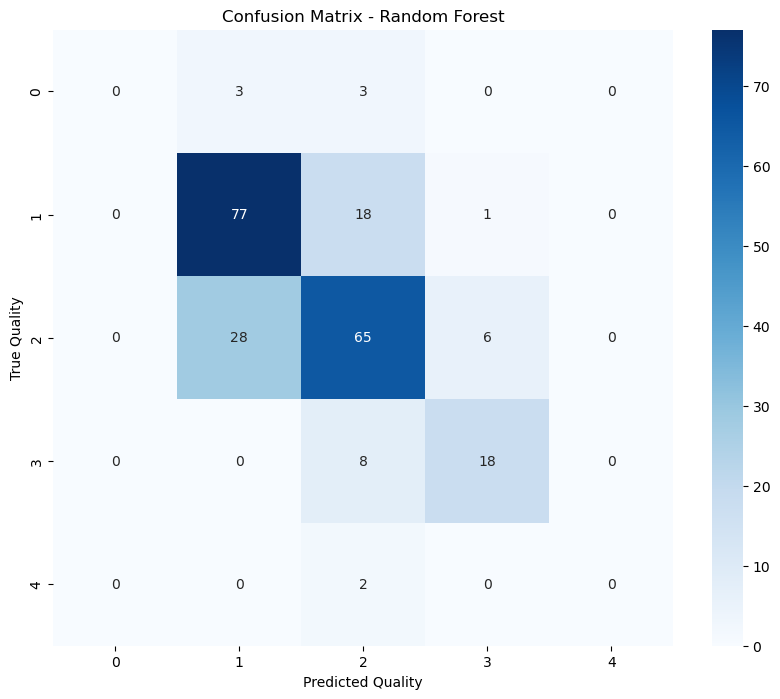

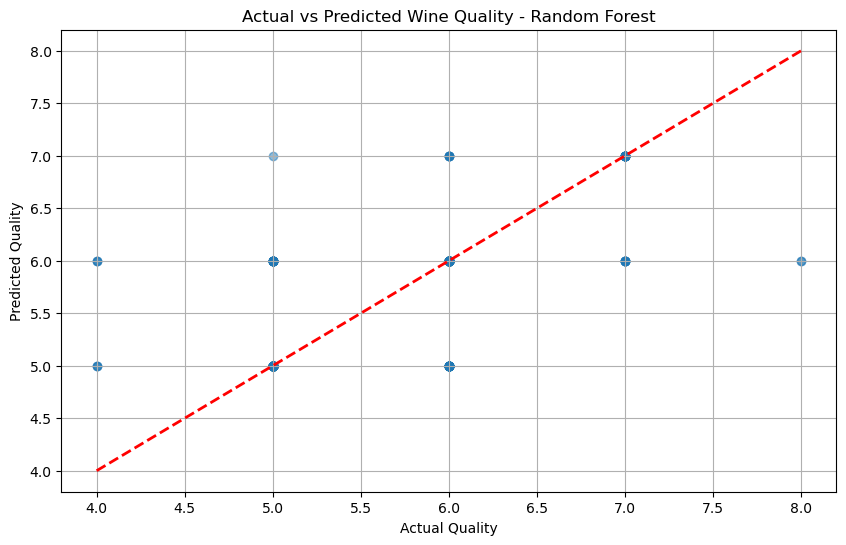

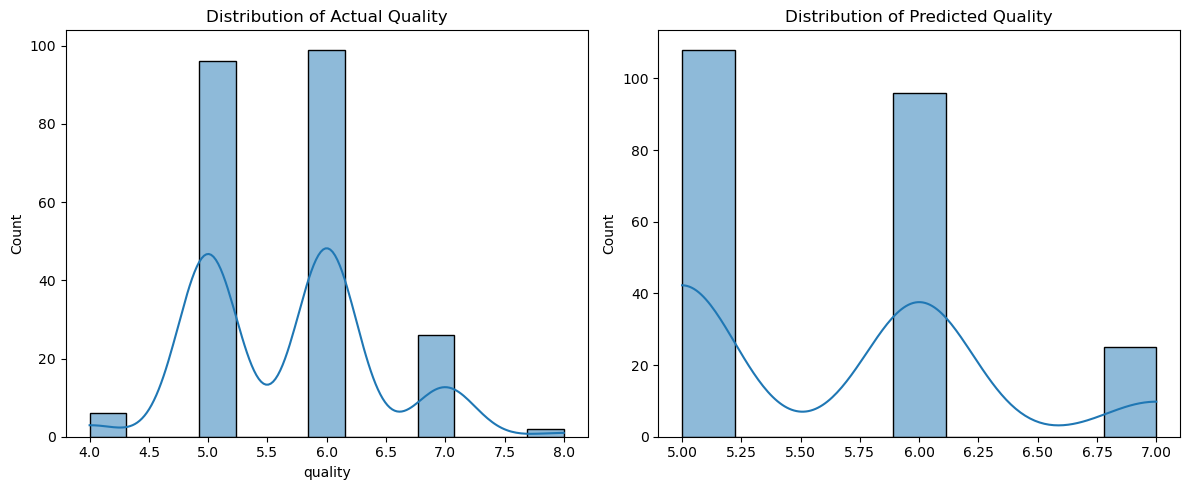

In [ ]:

# Create confusion matrix visualization for Random Forest
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Quality')
plt.xlabel('Predicted Quality')
plt.show()

# Create prediction vs actual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality - Random Forest')
plt.grid(True)
plt.show()

# Distribution of predictions vs actual
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_test, kde=True, label='Actual')
plt.title('Distribution of Actual Quality')
plt.subplot(1, 2, 2)
sns.histplot(rf_pred, kde=True, label='Predicted')
plt.title('Distribution of Predicted Quality')
plt.tight_layout()
plt.show()

## Conclusion
In this project, we successfully built a wine quality prediction system using machine learning. Here are the key takeaways:

- **Data Exploration:** The dataset contained 11 features and a target variable (quality). There were no missing values, and the quality scores ranged from 3 to 8, with most wines rated 5 or 6.
- **Visualization:** The correlation heatmap showed that features like alcohol, sulphates, and volatile acidity have a stronger relationship with quality. Scatter and box plots revealed patterns, such as higher volatile acidity being associated with lower quality.
- **Model Performance:** Among the three models, Random Forest generally performed the best due to its ability to handle imbalanced classes and non-linear relationships. SGD Classifier and SVC had lower performance, likely due to the need for hyperparameter tuning and the imbalanced nature of the dataset.
- **Feature Importance:** Random Forest feature importance indicated that alcohol, volatile acidity, and sulphates were among the most influential features for predicting wine quality.

**Future Improvements:**
- Perform hyperparameter tuning using GridSearchCV to improve model performance.
- Address class imbalance in the quality column using techniques like SMOTE.
- Explore additional features or feature engineering to enhance prediction accuracy.

This project demonstrates the practical application of machine learning in viticulture, providing insights into how chemical properties can predict wine quality.